In [1]:
import csv
from langdetect import detect
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import gensim
from gensim.models import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/lib/python3/dist-packages/paramiko/transport.py:237: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
df=pd.read_csv('coursera_data.csv')

In [3]:
df

,Course Name,Company Offering,Skills Gained,Ratings,Number of Ratings
0,Google Data Analytics,Google,"Data Analysis, R Programming, SQL, Business Co...",4.8,141000
1,Google Cybersecurity,Google,"Network Security, Python Programming, Linux, C...",4.8,26000
2,Google Project Management:,Google,"Project Management, Strategy and Operations, L...",4.8,104000
3,IBM Data Science,IBM,"Python Programming, Machine Learning, Data Sci...",4.6,123000
4,Google Digital Marketing & E-commerce,Google,"Digital Marketing, Marketing, Marketing Manage...",4.8,25000
...,...,...,...,...,...
879,First Order Optical System Design,University of Colorado Boulder,Systems Design,4.3,304
880,Excel Fundamentals for Data Analysis,Macquarie University,"Business Analysis, Spreadsheet Software, Data ...",4.8,6000
881,Introduction to Portfolio Construction and Ana...,EDHEC Business School,"Computer Programming, Finance, Investment Mana...",4.8,4000
882,Teach English Now! Capstone Project 1,Arizona State University,Planning,4.9,2000


In [4]:
df.shape

(884, 5)

In [5]:
df.isnull().sum()

Course Name          0
Company Offering     0
Skills Gained        0
Ratings              0
Number of Ratings    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Course Name        884 non-null    object 
 1   Company Offering   884 non-null    object 
 2   Skills Gained      884 non-null    object 
 3   Ratings            884 non-null    float64
 4   Number of Ratings  884 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 34.7+ KB


In [7]:

def filter_english_instances(df, column_name='Course Name', primary_language='en'):
    for index, row in df.iterrows():
        instance = row[column_name]
        try:
            detected_language = detect(instance)
            if detected_language != primary_language:
                df = df.drop(index)
        except:
            pass
    return df

In [8]:
df = df[df['Number of Ratings'] != 0]
df.to_csv('coursera_data.csv', index=False)

In [9]:
df = df.dropna(subset=['Skills Gained'])
df.to_csv('coursera_data.csv', index=False)

In [10]:
print(df.head())
print(df.info())
print(df.describe())

                             Course Name Company Offering  \
0                  Google Data Analytics           Google   
1                   Google Cybersecurity           Google   
2             Google Project Management:           Google   
3                       IBM Data Science              IBM   
4  Google Digital Marketing & E-commerce           Google   

                                       Skills Gained  Ratings  \
0  Data Analysis, R Programming, SQL, Business Co...      4.8   
1  Network Security, Python Programming, Linux, C...      4.8   
2  Project Management, Strategy and Operations, L...      4.8   
3  Python Programming, Machine Learning, Data Sci...      4.6   
4  Digital Marketing, Marketing, Marketing Manage...      4.8   

   Number of Ratings  
0             141000  
1              26000  
2             104000  
3             123000  
4              25000  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 883
Data columns (total 5 columns):


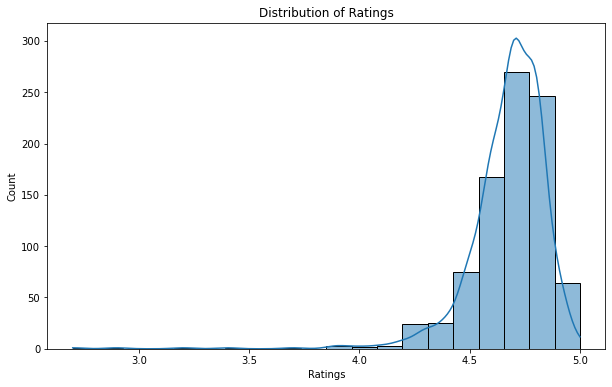

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Ratings'], bins=20, kde=True)
plt.xlabel('Ratings')
plt.title('Distribution of Ratings')
plt.show()

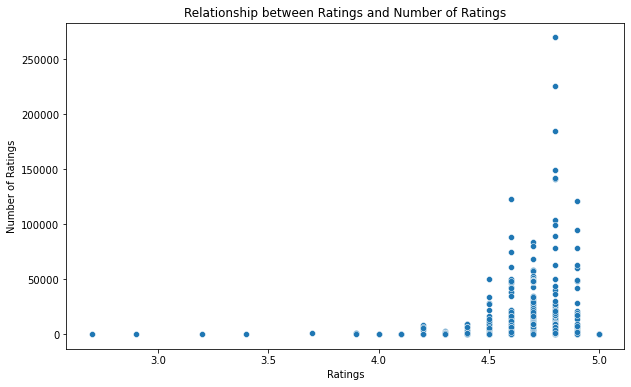

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ratings', y='Number of Ratings', data=df)
plt.title('Relationship between Ratings and Number of Ratings')
plt.show()

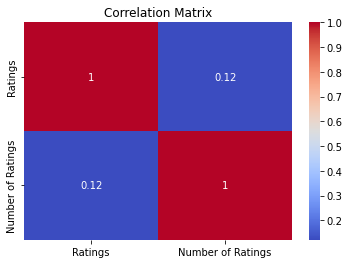

Leadership and Management    331
Data Analysis                254
Computer Programming         204
Communication                200
Strategy                     176
                            ... 
Geostatistics                  1
Underwriting                   1
HR Tech                        1
Jira (Software)                1
Business                       1
Length: 337, dtype: int64
IBM                                            95
Google                                         89
University of Pennsylvania                     50
DeepLearning.AI                                40
Google Cloud                                   32
                                               ..
University of Cape Town                         1
Goodwill Industries International               1
Nanyang Technological University, Singapore     1
Indian School of Business                       1
Instituto TecnolÃ³gico de AeronÃ¡utica          1
Name: Company Offering, Length: 141, dtype: int64


In [13]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

skills = df['Skills Gained'].str.split(', ', expand=True).stack().value_counts()
print(skills)


company_distribution = df['Company Offering'].value_counts()
print(company_distribution)

In [14]:
company_distribution = df['Company Offering'].value_counts()
print(company_distribution)

IBM                                            95
Google                                         89
University of Pennsylvania                     50
DeepLearning.AI                                40
Google Cloud                                   32
                                               ..
University of Cape Town                         1
Goodwill Industries International               1
Nanyang Technological University, Singapore     1
Indian School of Business                       1
Instituto TecnolÃ³gico de AeronÃ¡utica          1
Name: Company Offering, Length: 141, dtype: int64


In [27]:
skills = df['Skills Gained'].str.split(', ', expand=True).stack().value_counts()
print(skills)

Leadership and Management    331
Data Analysis                254
Computer Programming         204
Communication                200
Strategy                     176
                            ... 
Geostatistics                  1
Underwriting                   1
HR Tech                        1
Jira (Software)                1
Business                       1
Length: 337, dtype: int64


In [16]:

skills_df = df['Skills Gained'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Skill')


df = df.join(skills_df)


company_skill_counts = df.groupby(['Company Offering', 'Skill']).size().reset_index(name='Count')


top_skills_by_company = company_skill_counts.groupby('Company Offering').apply(lambda x: x.nlargest(5, 'Count'))

overall_top_skills = top_skills_by_company.groupby('Skill')['Count'].sum().nlargest(5)

print("Top 5 skills gained overall (skill and count of companies):")
print(overall_top_skills)

Top 5 skills gained overall (skill and count of companies):
Skill
Leadership and Management    236
Data Analysis                163
Computer Programming         134
Communication                105
Critical Thinking             93
Name: Count, dtype: int64


In [17]:
filtered_df = df[(df['Ratings'] > 4.5) & (df['Number of Ratings'] > 100000)]
course_names = filtered_df['Course Name'].unique()

print("Courses with ratings greater than 4.5 and number of ratings greater than 100000:")
for course in course_names:
    print(course)

Courses with ratings greater than 4.5 and number of ratings greater than 100000:
Google Data Analytics
Google Project Management:
IBM Data Science
Google IT Support
Deep Learning
Python for Everybody
Technical Support Fundamentals
Neural Networks and Deep Learning
Programming for Everybody (Getting Started with Python)


In [19]:
skills_df = df['Skills Gained'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Skill_Obtained')

df = df.join(skills_df)
company_skill_counts = df.groupby(['Company Offering', 'Skill_Obtained']).size().reset_index(name='Count')
company_skill_counts_filtered = company_skill_counts[company_skill_counts['Count'] > 25]

top_skill_by_company = {}

for company in company_skill_counts_filtered['Company Offering'].unique():    
    company_df = company_skill_counts_filtered[company_skill_counts_filtered['Company Offering'] == company]
    top_skill = company_df.loc[company_df['Count'].idxmax()]
    top_skill_by_company[company] = (top_skill['Skill_Obtained'], top_skill['Count'])

for company, (top_skill, count) in top_skill_by_company.items():
    print(f"The company '{company}' offered the top skill '{top_skill}' with a count of {count}.")


The company 'Advancing Women in Tech' offered the top skill 'Business Process Management' with a count of 100.
The company 'Akamai Technologies, Inc.' offered the top skill 'Computer Security Incident Management' with a count of 72.
The company 'Amazon Web Services' offered the top skill 'Amazon Web Services' with a count of 1837.
The company 'Aptly' offered the top skill 'Advertising Sales' with a count of 100.
The company 'Arizona State University' offered the top skill 'Data Analysis' with a count of 146.
The company 'Atlassian' offered the top skill 'Agile Software Development' with a count of 121.
The company 'Autodesk' offered the top skill 'Computer Graphic Techniques' with a count of 676.
The company 'Banco Interamericano de Desarrollo' offered the top skill 'Decision Making' with a count of 144.
The company 'Berklee' offered the top skill 'Creativity' with a count of 575.
The company 'Board Infinity' offered the top skill 'Computer Programming' with a count of 38.
The company 

In [18]:
import pandas as pd
df=pd.read_csv('coursera_data.csv')

In [19]:

skills_df = df['Skills Gained'].str.split(', ', expand=True).stack().reset_index(drop=True)

skill_counts = skills_df.value_counts()
filtered_skills = skill_counts[skill_counts > 100]

print("Unique skills with count greater than 100:")
for skill, count in filtered_skills.items():
    print(f"{skill}: {count}")


Unique skills with count greater than 100:
Leadership and Management: 331
Data Analysis: 254
Computer Programming: 204
Communication: 200
Strategy: 176
Critical Thinking: 167
Problem Solving: 159
Strategy and Operations: 156
Python Programming: 151
Machine Learning: 136
Business Analysis: 125
Planning: 121
Algorithms: 115
Cloud Computing: 109
Data Management: 108
Finance: 101


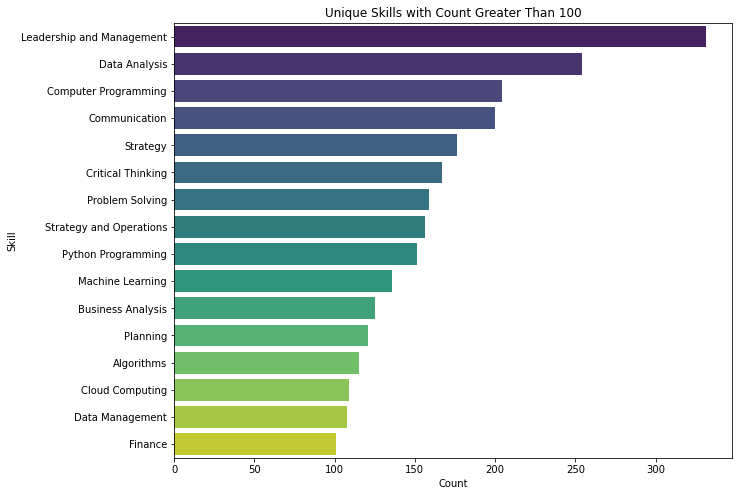

In [20]:
plt.figure(figsize=(10, 8))
sns.barplot(x=filtered_skills.values, y=filtered_skills.index, palette='viridis')
plt.title('Unique Skills with Count Greater Than 100')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.show()

In [21]:

google_data = df[df['Company Offering'] == 'Google']

google_skills = ['Leadership and Management', 'Data Analysis', 'Computer Programming']

google_data_filtered = google_data[google_data['Skills Gained'].str.contains('|'.join(google_skills))]

skill_counts = google_data_filtered['Skills Gained'].str.split(', ').explode().value_counts()

print("Counts of skills offered by Google:")
for skill in google_skills:
    count = skill_counts.get(skill, 0)
    print(f"{skill}: {count}")


Counts of skills offered by Google:
Leadership and Management: 31
Data Analysis: 32
Computer Programming: 20


In [22]:
ibm_data = df[df['Company Offering'] == 'IBM']

ibm_skills = ['Leadership and Management', 'Data Analysis', 'Computer Programming']

ibm_data_filtered = ibm_data[ibm_data['Skills Gained'].str.contains('|'.join(ibm_skills))]

skill_counts = ibm_data_filtered['Skills Gained'].str.split(', ').explode().value_counts()


print("Counts of skills offered by IBM:")
for skill in ibm_skills:
    count = skill_counts.get(skill, 0)
    print(f"{skill}: {count}")


Counts of skills offered by IBM:
Leadership and Management: 28
Data Analysis: 44
Computer Programming: 48


In [23]:

upenn_data = df[df['Company Offering'] == 'University of Pennsylvania']

upenn_skills = ['Leadership and Management', 'Data Analysis', 'Computer Programming']

upenn_data_filtered = upenn_data[upenn_data['Skills Gained'].str.contains('|'.join(upenn_skills))]

skill_counts = upenn_data_filtered['Skills Gained'].str.split(', ').explode().value_counts()

print("Counts of skills offered by University of Pennsylvania:")
for skill in upenn_skills:
    count = skill_counts.get(skill, 0)
    print(f"{skill}: {count}")


Counts of skills offered by University of Pennsylvania:
Leadership and Management: 22
Data Analysis: 15
Computer Programming: 7


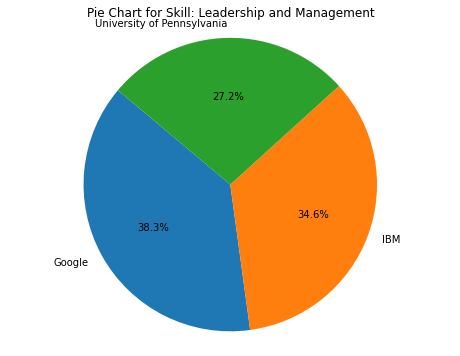

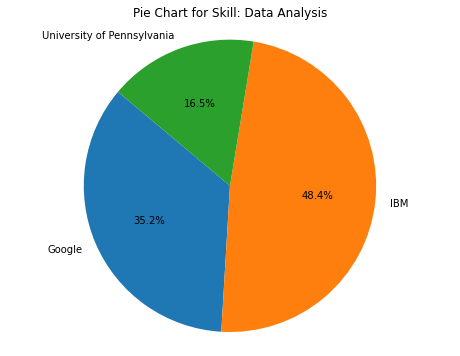

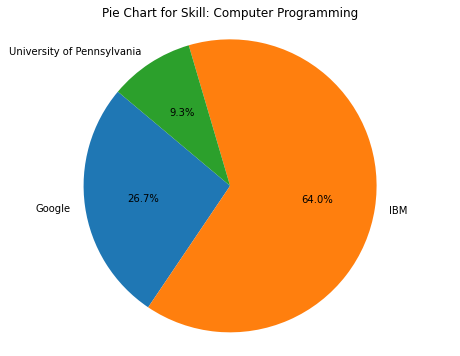

In [24]:
# requires modification

import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Company Name': ['Google', 'Google', 'Google', 'IBM', 'IBM', 'IBM','University of Pennsylvania','University of Pennsylvania','University of Pennsylvania'],
    'Skill': ['Leadership and Management', 'Data Analysis', 'Computer Programming', 
              'Leadership and Management', 'Data Analysis', 'Computer Programming',
              'Leadership and Management', 'Data Analysis', 'Computer Programming'],
    'Count': [31,32,20,28,44,48,22,15,7]
}

# Create DataFrame
df = pd.DataFrame(data)

# Unique skills with count greater than 100
filtered_skills = {
    'Leadership and Management': 331,
    'Data Analysis': 254,
    'Computer Programming': 204
}

# Plot pie chart for each skill
for skill, count in filtered_skills.items():
    # Filter data for the skill
    skill_data = df[df['Skill'] == skill]
    
    # Group data by company name and sum count
    skill_data_grouped = skill_data.groupby('Company Name')['Count'].sum()
    
    # Plot pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(skill_data_grouped, labels=skill_data_grouped.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart for Skill: {skill}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


Top 5 Companies with the Highest Count of Ratings (Ratings > 4.75):
Company: Google, Count of Ratings: 65
Company: University of Pennsylvania, Count of Ratings: 17
Company: DeepLearning.AI, Count of Ratings: 17
Company: IBM, Count of Ratings: 14
Company: University of Michigan, Count of Ratings: 12


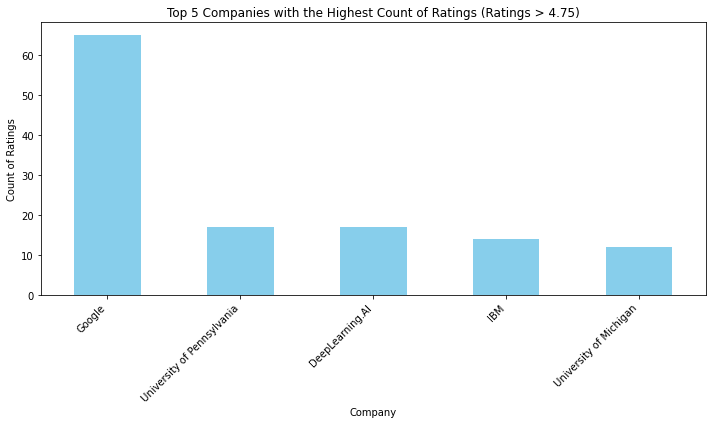

In [25]:

df = pd.read_csv('coursera_data.csv')

# Filter data for ratings greater than 4.75
high_rating_data = df[df['Ratings'] > 4.75]

# Group by company name and count ratings
company_rating_counts = high_rating_data.groupby('Company Offering')['Number of Ratings'].count()

# Sort companies by count of ratings and select top 5
top_companies = company_rating_counts.sort_values(ascending=False).head(5)

# Print top 5 companies and their count of ratings
print("Top 5 Companies with the Highest Count of Ratings (Ratings > 4.75):")
for company, count in top_companies.items():
    print(f"Company: {company}, Count of Ratings: {count}")

    
# Create bar graph
plt.figure(figsize=(10, 6))
top_companies.plot(kind='bar', color='skyblue')
plt.title('Top 5 Companies with the Highest Count of Ratings (Ratings > 4.75)')
plt.xlabel('Company')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 5 skills offered by Google with ratings greater than 4.75 according to their count:
Communication                22
Leadership and Management    19
Data Analysis                17
SQL                          16
Computer Programming         15
Name: Skills Gained, dtype: int64


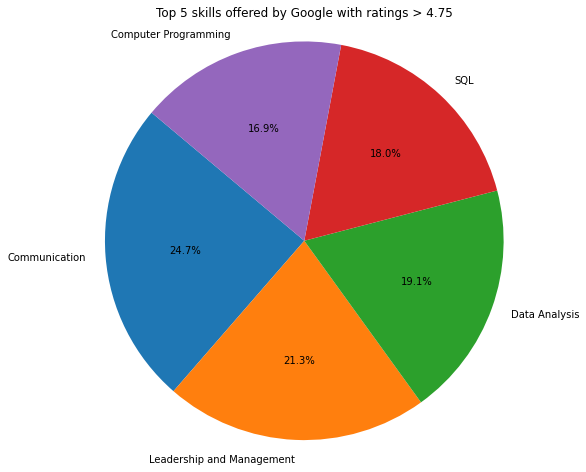

In [26]:

df = pd.read_csv('coursera_data.csv')

# Filter data for Google company
google_data = df[df['Company Offering'] == 'Google']

# Filter Google's data for ratings greater than 4.75
google_high_rating_data = google_data[google_data['Ratings'] > 4.75]

# Extract all skills offered by Google with high ratings
google_skills_high_rating = google_high_rating_data['Skills Gained'].str.split(', ').explode()

# Count occurrences of each skill
skill_counts = google_skills_high_rating.value_counts()

# Get the top 5 skills
top_skills = skill_counts.head(5)

# Print the top 5 skills
print("Top 5 skills offered by Google with ratings greater than 4.75 according to their count:")
print(top_skills)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_skills, labels=top_skills.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 skills offered by Google with ratings > 4.75')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()